In [1]:
from pm4py.objects.log.importer.xes import importer as xes_importer
import pm4py
from src.PetriNetBPS import SimulatorParameters, SimulatorEngine

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import Event Log and Petri Net

log = xes_importer.apply('example_data/purchasing_order.xes')
net, initial_marking, final_marking = pm4py.read_pnml('example_data/purchasing.pnml')

parsing log, completed traces :: 100%|██████████| 608/608 [00:00<00:00, 1453.15it/s]


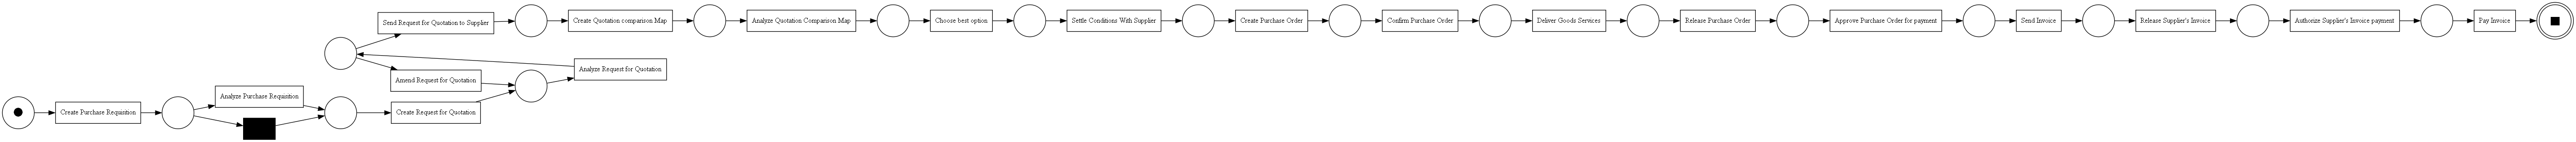

In [3]:
# View Petri Net

pm4py.view_petri_net(net, initial_marking, final_marking)

In [4]:
# Discover Simulation Parameters from Event Log 

parameters = SimulatorParameters(net, initial_marking, final_marking)
parameters.discover_from_eventlog(log, mode_ex_time='resource', mode_trans_weights='data_attributes', history_weights='count', model_type='RandomForest')

100%|██████████| 20/20 [00:00<00:00, 32.74it/s]


Finding best fit execution time distribution for each resources...


100%|██████████| 27/27 [00:16<00:00,  1.62it/s]


In [5]:
parameters.arrival_time_distr

('exponential', {'loc': 0.0, 'scale': 17210.85201793722})

In [6]:
# Create simulator

simulator = SimulatorEngine(net, initial_marking, final_marking, parameters)

In [7]:
# Simulate data

log_data = simulator.simulate(len(log))

  0%|          | 0/760 [00:00<?, ?it/s]

100%|██████████| 760/760 [04:26<00:00,  2.85it/s]


In [8]:
# Show simulation data

log_data

,case:concept:name,concept:name,start:timestamp,time:timestamp,org:resource,org:role
908,1,Create Purchase Requisition,2011-01-11 06:36:18.000000,2011-01-11 07:08:46.745921,Clement Duchot,Requester
909,1,Create Request for Quotation,2011-01-11 07:08:46.745921,2011-01-11 07:10:14.139687,Maris Freeman,Requester Manager
919,2,Create Purchase Requisition,2011-01-11 10:50:29.000000,2011-01-11 11:34:45.605578,Francis Odell,Requester Manager
920,2,Analyze Purchase Requisition,2011-01-11 11:34:45.605578,2011-01-11 11:39:59.483974,Maris Freeman,Requester Manager
921,2,Create Request for Quotation,2011-01-11 11:39:59.483974,2011-01-11 11:48:43.325756,Clement Duchot,Requester
...,...,...,...,...,...,...
13975,607,Release Supplier's Invoice,2011-06-16 17:46:13.125449,2011-06-16 17:51:38.604191,Karalda Nimwada,Financial Manager
13976,607,Authorize Supplier's Invoice payment,2011-06-16 17:55:57.374079,2011-06-16 17:55:57.374079,Karalda Nimwada,Financial Manager
13977,606,Pay Invoice,2011-06-16 17:51:38.604191,2011-06-16 17:55:57.374079,Karalda Nimwada,Financial Manager
13979,605,Pay Invoice,2011-06-16 17:51:02.209609,2011-06-16 17:57:22.294595,Pedro Alvares,Financial Manager


In [9]:
# Number of process instances

len(log_data['case:concept:name'].unique())

608